# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vax = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv")

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(vax)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [42]:
# create the df_vacc_rates here
df_vacc_rates = data.frame(vax) |>
    filter(mmr >= 0) |>
    group_by(state) |>
    mutate(goal_rate = sum(mmr >= 95, na.rm = TRUE)) |>
    mutate(fraction = goal_rate / n()) |>
    summarize(fraction)

df_vacc_rates

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,fraction
<chr>,<dbl>
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048
Arizona,0.5064048


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [65]:
df_vacc_rates |>
    group_by(state) |>
    summarize(state_rate = min(fraction)) |>
    arrange(desc(state_rate))

state,state_rate
<chr>,<dbl>
Illinois,0.896825397
California,0.888506151
Massachusetts,0.865828092
New York,0.859822073
Pennsylvania,0.834966478
Connecticut,0.811544992
South Dakota,0.742627346
Montana,0.708812261
Vermont,0.683431953


### Arkansas has the smallest fraction of schools above the 95% CDC vaccination rate recommendation.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [67]:
nc_vax_rates = data.frame(vax) |>
    filter(overall >= 0) |>
    filter(state == "North Carolina") |>
    mutate(goal = sum(overall >= 95, na.rm = TRUE)) |>
    mutate(nc_fraction = goal / n())

head(nc_vax_rates)

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,goal,nc_fraction
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297,1771,0.8498081
2,2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281,1771,0.8498081
3,3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403,1771,0.8498081
4,4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704,1771,0.8498081
5,5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820,1771,0.8498081
6,6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674,1771,0.8498081


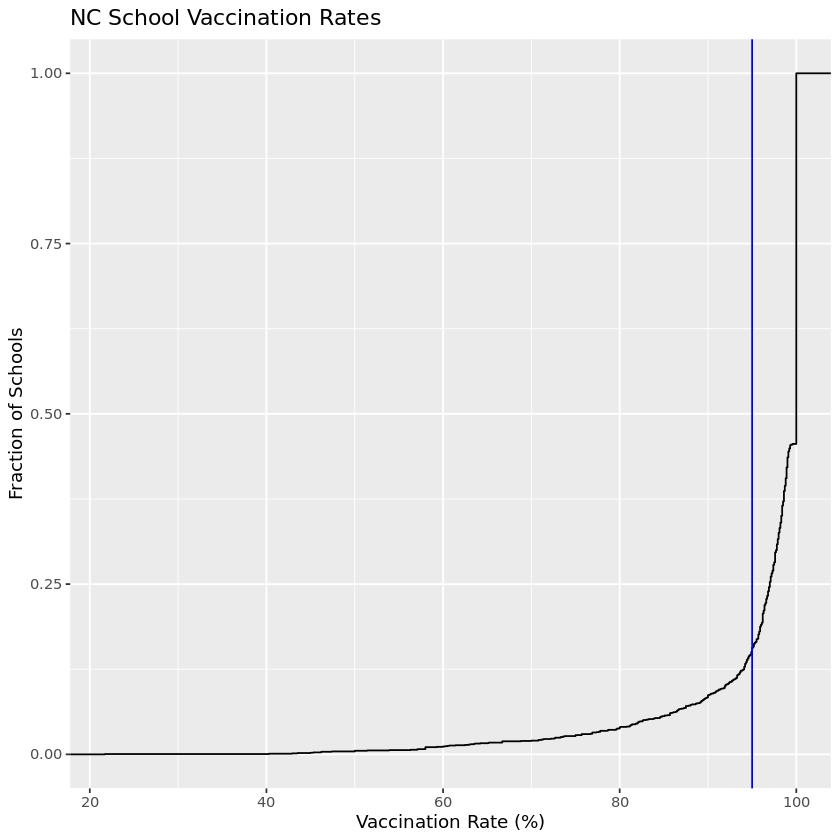

In [68]:
nc_rates_p = ggplot(nc_vax_rates, aes(x = overall, y = nc_fraction)) + stat_ecdf() + 
    labs(x = "Vaccination Rate (%)", y = "Fraction of Schools", title = "NC School Vaccination Rates") + 
    geom_vline(xintercept = 95, color = 'blue')
nc_rates_p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [69]:
nc_vax_rates = data.frame(vax) |>
    filter(overall >= 0) |>
    filter(state == "North Carolina") |>
    mutate(median_rate = median(overall, na.rm = TRUE))
    #mutate(median_rate = mean(overall, na.rm = TRUE))
    #mutate(median_rate = min(overall, na.rm = TRUE))

nc_vax_rates |> head()

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,median_rate
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297,100
2,2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281,100
3,3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403,100
4,4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704,100
5,5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820,100
6,6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674,100


### Yes, the median vaccination rate for NC is above the CDC 95% target.